<a href="https://colab.research.google.com/github/qraxiss/learning-data-science/blob/main/machine-learning/classification/ysa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data & Libs

In [141]:
# Libs
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import StandardScaler

from warnings import filterwarnings
filterwarnings('ignore')

# Data
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/learning-data-science-main/machine-learning/datas/diabetes.csv")
df = df.dropna()
df.index = np.arange(df.shape[0])

# X&y
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

# Test Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=31)

# Scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Model

In [144]:
mlpc_model = MLPClassifier().fit(X_train_scaled, y_train)

# Predict

In [145]:
print("Basic Accuracy Score",accuracy_score(y_test, mlpc_model.predict(X_test_scaled)))
print("CV Accuracy Score",cross_val_score(mlpc_model,
                                          X_test_scaled, 
                                          y_test, 
                                          cv=10).mean())

Basic Accuracy Score 0.7705627705627706
CV Accuracy Score 0.7704710144927536


# Model Tuning

In [149]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

mlpc = MLPClassifier()
mlpc_cv = GridSearchCV(mlpc, mlpc_params, cv=3, n_jobs=-1, verbose=2).fit(X_train_scaled, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


In [152]:
print("En iyi skor:" + str(mlpc_cv.best_score_))
print("En iyi parametreler: " + str(mlpc_cv.best_params_))
params = pd.Series(mlpc_cv.best_params_)

En iyi skor:0.7635009310986964
En iyi parametreler: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


## Tuned Model

In [157]:
mlpc = MLPClassifier(activation="relu", 
                    alpha=0.0001,
                    hidden_layer_sizes=(100, 100),
                    solver="sgd")
mlpc_tuned = svc.fit(X_train_scaled, y_train)

In [158]:
print("Basic Accuracy Score",accuracy_score(y_test, mlpc_tuned.predict(X_test_scaled)))
print("CV Accuracy Score",cross_val_score(mlpc_tuned,
                                          X_test, 
                                          y_test, 
                                          cv=10).mean())

Basic Accuracy Score 0.7662337662337663
CV Accuracy Score 0.643840579710145


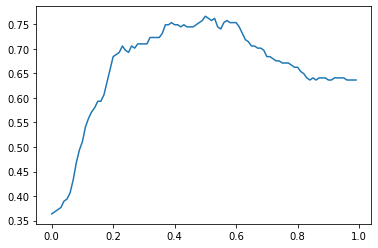

In [160]:
# Yüzdesel Oranlar
y_probs = pd.DataFrame(mlpc_tuned.predict_proba(X_test_scaled))
max = []
for j in np.arange(0,1,0.01):
  y_pred = np.array([1 if i > j else 0 for i in list(y_probs[1])])
  max.append([j ,accuracy_score(y_test, y_pred)])

max = np.array(max)

# Plot
import seaborn as sns
sns.lineplot(y=max[:,1], x=max[:,0])

# Plot

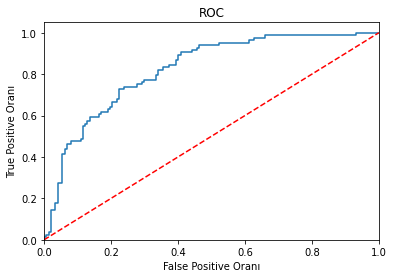

In [163]:
logit_roc_auc = roc_auc_score(y_test, svc_tuned.predict(X_test_scaled))

fpr, tpr, thresholds = roc_curve(y_test, svc_tuned.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()